In [6]:
import math
import numpy as np
from scipy.optimize import fsolve
from ambiance import Atmosphere
import matplotlib.pyplot as plt
import csv

# Fuselage design 

Steps from Sadraey
1. Identify and list the fuselage design requirements.
2. Select fuselage layout (internal): side view, front view, and top view.
3. Establish the fuselage optimum length-to-diameter ratio (Lf/Df)opt.
4. length-to-diameter ratio.
5. Design the cargo/luggage compartment.
6. Determine the required volume for other components (e.g., fuel, landing gear).
7. Check if the available fuselage space for other components is sufficient.
8. Calculate the fuselage maximum diameter (Df).
9. Select the number of access panels for maintenance.
10. Design the fuselage nose section.
11. Design the fuselage rear section.
12. Determine the upsweep angle (αus).
13. Calculate the fuselage overall length (Lf).
24. Apply lofting.
15. Check if the fuselage design satisfies the design requirements.
16. If any design requirement is not met, return to the relevant design step and recalculate the corresponding parameter.
17. Optimize.
18. Draw the final design with dimensions.

**Step 1: Aircraft type, mission, and design requirements.**
 - Type: commercial UAV
 - Payload: Cargo (avionics, batteries, etc.)
 - Range (km): 200 km
 - Cruise ceiling (m ASL): 4000 m
 - Design requirements: ask Integration


**Step 2: Fuselage internal layout**
Fuselage configuration: standard cylindrical fuselage with cone shaped nose and rear (single fuselage, single deck)

<ins>The following items must be accommodated by the fuselage:</ins>\
– Cabin for systems and payload.\
– Measurement and control systems\
– Mechanical, electrical systems.\
– Landing gear.

<ins>Basic observation and constraints:</ins>
1. the fuselage is preferred to be symmetric from a top view.	
2. the fuselage must be as small and compact as possible.
3. the usable loads (battery) must be close to the aircraft center of gravity.
4. a standard circular cross-section was selected for the cockpit and cabin during the conceptual design.
5. the arrangement must be such that the aircraft center of gravity is close to the wing/fuselage aerodynamic center.	

Side and top view of internal arrangement (to update)

**Step 3: Fuselage length to diameter ratio**

$$
\begin {align}
\Large D_f = W_c + 2T_w \\
\Large L_f = L_C + L_{CP} + L_N + L_R \\
\frac{L}{D} = \frac{L_f}{D_f} \\
\end {align}
$$


Where:\
D<sub>f</sub> = fuselage diameter (m)\
T<sub>W</sub> = fuselage wall thickness (m)\
L<sub>f</sub>= fuselage length\
L<sub>C</sub> = cabin length\
L<sub>CP</sub> = cockpit length (m) =1.5D\
L<sub>N</sub> = nose length (m)\
L<sub>R</sub> = rear length (m)\
L/D = length-to-diameter ratio 


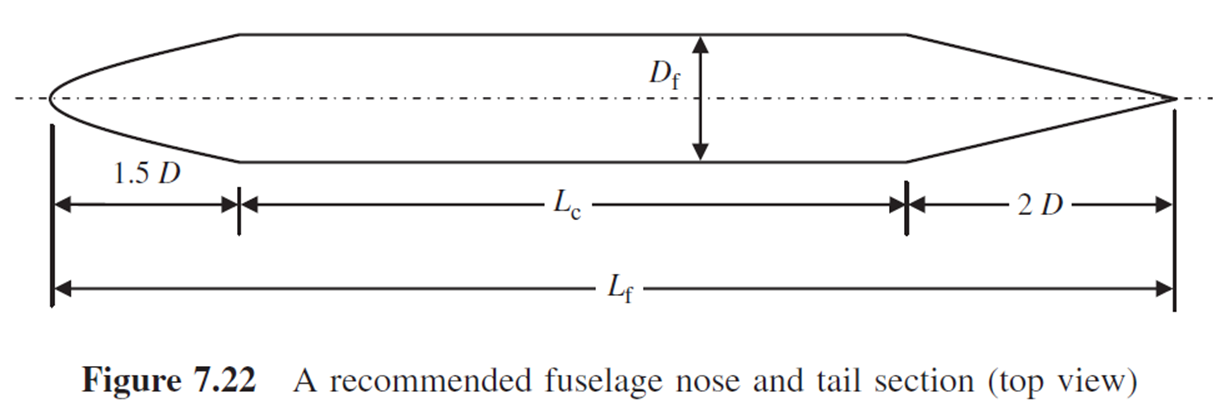

**Step 4: Check if the available fuselage space for other components is sufficient**

$$
\begin{align}
\Large\frac{1}{2}(\pi\frac{W_C^2}{4}L_C)  \\

\ W_c = D + 2T_w \\

\ V_{extra} = V_{bottom} - V_{payload} \\
\end{align}
$$

Where:\
V<sub>bottom</sub> = storage space at the bottom of fuselage if required (m<sup>3</sup>)\
W<sub>C</sub> = cabin width (m<sup>2</sup>)\
L<sub>C</sub> = cabin length (m)\
V<sub>extra</sub> = extra space which must be provided by nose and rear


**Step 5: Nose sizing**

"The length of the nose section must be such that it is 1.5 to 2 times the fuselage diameter." (Sadraey)\

$$
\begin {align}
\Large L_N = 1.5 * D_f 
\end {align}
$$

Where:\
L<sub>N</sub> = Nose length (m)\
D<sub>f</sub> = Maximum diameter of fuselage (m)

**Step 6: Rear sizing (assume it has a cone shape)**

Design objectives for this part: 
 - Provide V<sub>extra</sub> of space for payload if required. 
 - Provide ground clearance for the aircraft during take-off rotation. 	
 - Smoothly reduce the cabin diameter to near zero.
 
 Formula: 

$$
\begin {align}
V_{cone} = \frac{1}{3}\pi*r^2L_R \text{ }⇨\text{ }  L_R = \frac{3V_{cone}}{\pi*(W_C/2)^2} \\
\end {align}
$$

*Note: make sure cone angle is max. 20 degrees, if not, use cone angle = 20 to determine rear length using alpha<sub>cone</sub> = atan((D<sub>f</sub>/2)/L<sub>R</sub>).

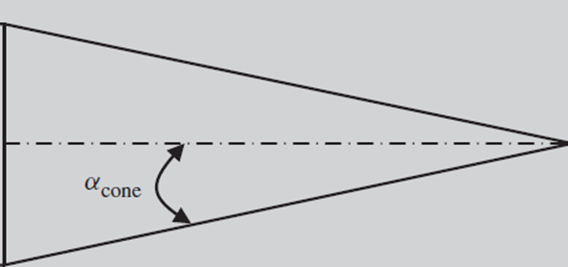

Where:\
V<sub>cone</sub> = cone volume (m<sup>3</sup>)\
r = radius (W<sub>C</sub>/2) (m)\
L<sub>R</sub> = length of rear section (m).

Then, recalculate L/D using nose and rear sizes.



**Step 7: Upsweep angle**

First, select a benchmark upsweep angle (e.g. 17)

$$
\begin {align}
\Large tan(\alpha_{us})=\frac{D_f/2}{L_{us}}
\end {align}
$$

Where:\
Alpha<sub>us</sub> = upsweep angle (from benchmarking), in deg.\
D<sub>f</sub> = maximum diameter (m)\
L<sub>us</sub> = upsweep length (rear length with taper added), in meters.


**Step 8: Lofting**
\
Make the nose semicircular and add upsweet to the top and bottom of the rear.

**Step 9: Conventional fuselage volume formula (Gundmundsson ch.11)**
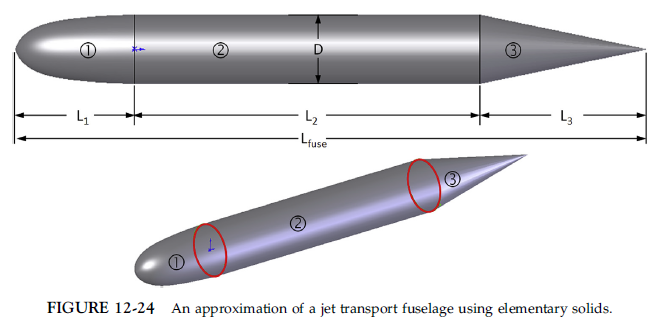
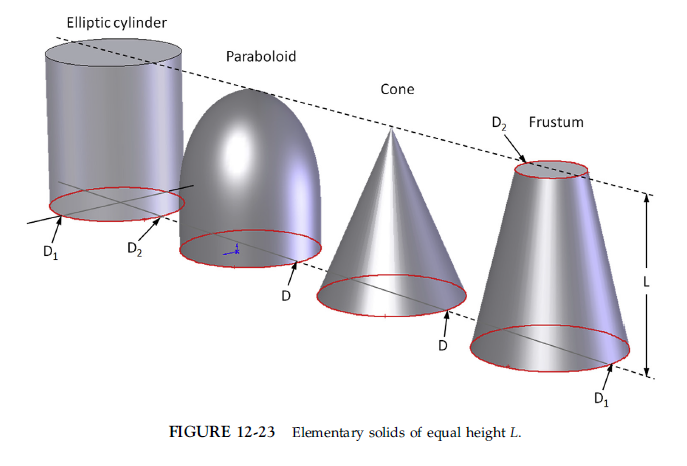

Volume cylinder
$$
\begin {align}
\Large V_{UC}=\frac{\pi*(D^2)*L}{4}
\end {align}
$$
Volume paraboloid
$$
\begin {align}
\Large V_{paraboloid}=\frac{\pi*(D^2)*L}{8}
\end {align}
$$
Volume frustrum
$$
\begin {align}
\Large V_{f}=\frac{\pi*L}{12}*(D_{1}^2+D_{1}D_{2}+D_{2}^2)
\end {align}
$$

Where:
\
V<sub>UC</sub>=Volume of uniform cylinder. \
V<sub>paraboloid</sub> = volume of paraboloid.\
V<sub>f</sub> = volume of frustrum. \
D = diameter. \
L = length.

# Fuselage sizing loop 0: based on space envelopes & OpenVSP

Inputs: maximum space envelopes for internal components (from propulsion and avionics), no superposed parts (all on fuselage floor), maximum weights given.

Note: assumption for locating the components is that the C.G. is close to the center of the fuselage and/or location of avionic components in benchmark UAVs. 

**Top and side view of internal layout**
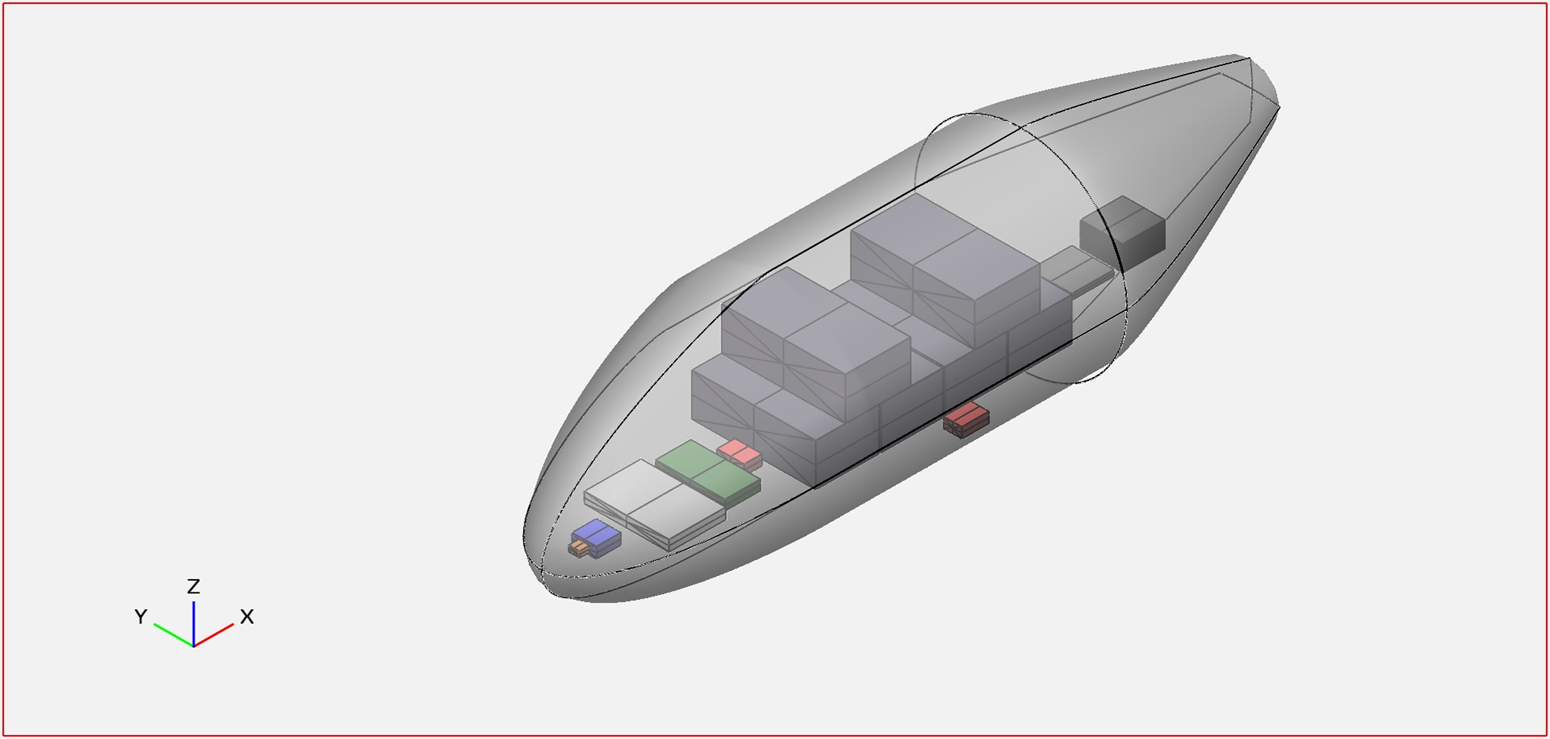


In [7]:

#From OpenVSP - conventional fuselage
print("conventional fuselage shape")
L_f = .8375
D_f = 0.25 #actual value from lofting = 196 mm
Length_to_diameter = L_f/D_f
D_aft = 0.282*D_f #from OpenVSP lofting
L_paraboloid=1.090*D_f
L_frustrum = 1.090*D_f
V_paraboloid = (math.pi*(D_f**2)*L_paraboloid)/8
V_f = ((math.pi*L_f)/12)*((D_f**2)+(D_f*D_aft)+(D_aft**2))
V_total = V_paraboloid + V_f

print("Maximum fuselage length, L_f",L_f,"m")
print("Maximum fuselage diameter, D_f",D_f,"m")
print("Length to diameter ratio, L/D",Length_to_diameter)
print("total volume",V_total, "m^3")

#determine formula for 

#From OpenVSP - prismatic fuselage 
print("prismatic fuselage - square base")
H = 0.25
W = 0.25
L = 0.75
V_foam = W*H*L
print("fuselage height",H,"m")
print("fuselage width",W,"m")
print("fuselage length",L, "m")
print("Fuselage volume for prismatic fuselage = ",V_foam,"m^3")

#formula using Sadraey
print("Fuselage length using Sadraey")
L_c = 0.75 #cabin length
D_max = 0.25
L_N = 1.5*D_max #nose length
L_R = 2*D_max #aft length
L_total = L_c+L_N+L_R
Length_to_dia_fuse = L_total/D_max
V_nose= (math.pi*(D_max**2)*L_N)/8
V_rear = (math.pi/3)*((D_max/2)**2)*L_R
V_cabin = math.pi*((D_max/2)**2)*L_c
V_fuse = V_nose+V_rear+V_cabin
print("Cabin length",L_c,"m")
print("Nose length", L_N, "m")
print("Rear length",L_R,"m")
print("Total fuselage length",L_total,"m")
print("Volume of fuselage",V_fuse,"m")
print("L/D",Length_to_dia_fuse)



conventional fuselage shape
Maximum fuselage length, L_f 0.8375 m
Maximum fuselage diameter, D_f 0.25 m
Length to diameter ratio, L/D 3.35
total volume 0.025345884382171936 m^3
prismatic fuselage - square base
fuselage height 0.25 m
fuselage width 0.25 m
fuselage length 0.75 m
Fuselage volume for prismatic fuselage =  0.046875 m^3
Fuselage length using Sadraey
Cabin length 0.75 m
Nose length 0.375 m
Rear length 0.5 m
Total fuselage length 1.625 m
Volume of fuselage 0.054200654505292656 m
L/D 6.5


**Loop 0: C.G. determination**

Methodology: 
1. Assume C.G. at center of fuselage. 
2. Balance given payload as much as possible about it. 
3. Choose a datum (in this case, at length of nose, given by OpenVSP formula) 
4. Measure arm from datum to centroid of each payload item. 
5. Multiply arm * weight of each component to get their moments. 
6. Add up all the moments, divide by total weight to get the longitudinal C.G. 
7. Assume y- and z-coordinate of C.G. at center of diameter in both ways. 
8. Verify that this value is within the desired range from stability analysis. If so, continue, if not, reorganize and recalculate the C.G. 
9. If C.G. appropriate, place wing and start the next sizing loop. 

\
reference: https://www.faa.gov/sites/faa.gov/files/12_phak_ch10.pdf
\
\
**Datum and labels of repeated components**
\
Update

In [8]:
#loop 1 c.g. calculation: method using payload weights 
#note: will need readjusting to move wing forward, need to verify using simulations

#payload list and masses (using max. weights), kg
m_liDAR1 = 0.025
m_liDAR2 = 0.025
m_liDAR3 = 0.025
m_liDAR4 = 0.025
m_RGBcam = 0.01
m_thlenses = 0.005
m_GNSS = 0.035
m_IMU = 0.13
m_telemetrysyst = 0.08
m_flightcontroller = 0.049
m_batt1 = 1.1
m_batt2 = 1.1
m_batt3 = 1.1
m_batt4 = 1.1
m_batt5 = 1.1
m_batt6 = 1.1

#weight using g = 9.81 m/s^2, N
W_liDAR1 = m_liDAR1*9.81
W_liDAR2 = m_liDAR2*9.81
W_liDAR3 = m_liDAR3*9.81
W_liDAR4 = m_liDAR4*9.81
W_RGBcam = m_RGBcam*9.8
W_thlenses = m_thlenses*9.81
W_GNSS = m_GNSS*9.81
W_IMU = m_IMU*9.81
W_telemetrysyst = m_telemetrysyst*9.81
W_flightcontroller = m_flightcontroller*9.81
W_batt1 = m_batt1*9.81
W_batt2 = m_batt2*9.81
W_batt3 = m_batt3*9.81
W_batt4 = m_batt4*9.81
W_batt5 = m_batt5*9.81
W_batt6 = m_batt6*9.81

#arm (from datum shown above), meters
arm_liDAR1 = 0.0805
arm_liDAR2 = 0.0805
arm_liDAR3 = -0.091875
arm_liDAR4 = 0.245625
arm_RGBcam = -0.2605
arm_thlenses = -0.2809
arm_GNSS = 0.3
arm_IMU = -0.1915
arm_telemetrysyst = 0.36
arm_flightcontroller = -0.129
arm_batt1 = 0.1135
arm_batt2 = 0.0385
arm_batt3 = -0.0365
arm_batt4 = 0.2255
arm_batt5 = 0.0185
arm_batt6 = 0.151

#resulting moments in N*m
M_liDAR1 = arm_liDAR1*W_liDAR1
M_liDAR2 = arm_liDAR2*W_liDAR2
M_liDAR3 = arm_liDAR3*W_liDAR3
M_liDAR4 = arm_liDAR4*W_liDAR4
M_RGBcam = arm_RGBcam*W_RGBcam
M_thlenses = arm_thlenses*W_thlenses
M_GNSS = arm_GNSS*W_GNSS
M_IMU = arm_IMU*W_IMU
M_telemetrysyst = arm_telemetrysyst*W_telemetrysyst
M_flightcontroller = arm_flightcontroller*W_flightcontroller
M_batt1 = arm_batt1*W_batt1
M_batt2 = arm_batt2*W_batt2
M_batt3 = arm_batt3*W_batt3 
M_batt4 = arm_batt4*W_batt4
M_batt5 = arm_batt5*W_batt5
M_batt6 = arm_batt6*W_batt6

#C.G payload (N*m) from nose tip, meters
M_total = M_liDAR1+M_liDAR2+M_liDAR3+M_liDAR4+M_RGBcam+M_thlenses+M_GNSS+M_IMU+M_telemetrysyst+M_flightcontroller+M_batt1+M_batt2+M_batt3+M_batt4+M_batt5+M_batt6 #total moment
W_total = W_liDAR1+W_liDAR2+W_liDAR3+W_liDAR4+W_RGBcam+W_thlenses+W_GNSS+W_IMU+W_telemetrysyst+W_flightcontroller+W_batt1+W_batt2+W_batt3+W_batt4+W_batt5+W_batt6 #total weight
C_G = M_total/W_total #C.G. from datum
Datum = 0.31 #measured from openVSP system of axes
C_G_longitudinal = Datum + C_G # C.G from nose length
print("Longitudinal C.G. from nose tip",C_G_longitudinal,"m")






Longitudinal C.G. from nose tip 0.3918229047695991 m


**Wing & tail position with respect to fuselage c.g.**
\
\
C.G. envelope range: min. 0.05 m to 0.119 m from wing's leading edge (range obtained from the stability analysis)
\
\
**Range of wing positions with respect to the C.G to test for stability**
\
\
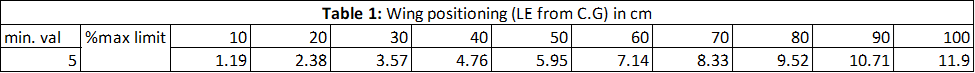
\
\
**aerodynamic center assumption for tail and wing**
\
\
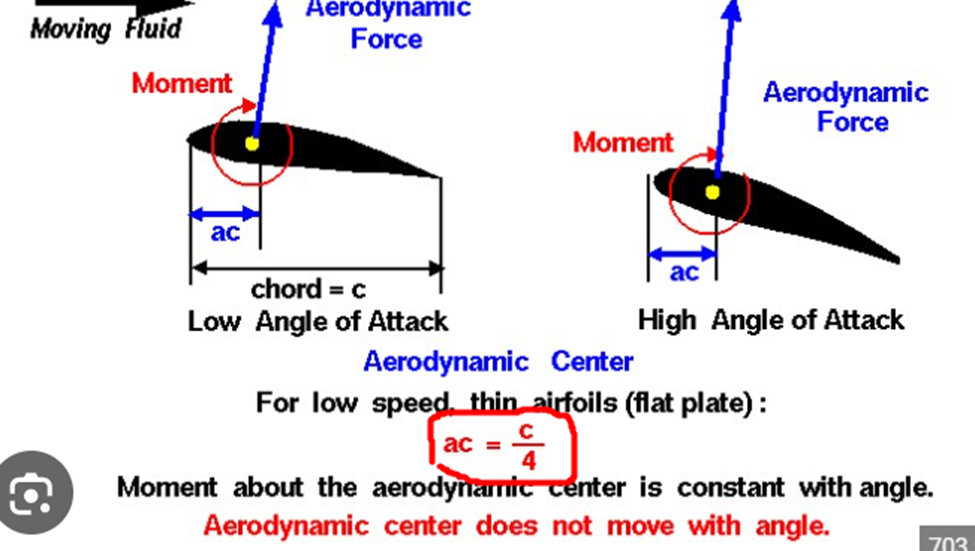

In [9]:
#
ref = 0 #coordinates of nose tip
x_cg = C_G_longitudinal + ref
d_min = 0.1024 #min distance between C.G and LE of wing
d_max = 0.23407 #max distance between C.G and LE of wing 
d_ideal = 0.17554
percent_LE = 0.7 #percent of max distance between C.G and LE
d_LE = x_cg-(d_ideal)
c_w = 0.292 #wing chord
c_t = 0.14964 #tail chord
x_cg_percent_chord = (d_ideal)/c_w
arm_tail = 0.87 #distance from wing quarter chord to tail quarter chord
x_tail = d_LE+(0.25*c_w)+arm_tail-(0.25*c_t)
X_ac_h = d_LE+(0.25*c_w)+arm_tail+(c_t/4) #AC assumption
X_ac_w = d_LE+(c_w/4)#AC assumption
#AC_w = 0.001 #find formula for aerodynamic center
#AC_t = 0.001 #find formula for aerodynamic center
#X_ac_h = d_LE+(0.25*c_w)+arm_tail+(AC_t/4) #AC assumption
#X_ac_w = d_LE+(AC_w/4)#AC assumption
print("Wing chord length",c_w,"m")
print("Tail chord length",c_t, "m")
print("Longitudinal C.G. from nose tip",C_G_longitudinal,"m")
print("C.G. location as a percentage of the chord",x_cg_percent_chord*100,"%")
print("Distance from nose tip to wing's LE",d_LE,"m")
print("Distance from nose tip to tail's LE",x_tail,"m")
print("Tail aerodynamic center, X_ac_w",X_ac_h,"m")
print("Wing/fuselage aerodynamic center, X_ac_w",X_ac_w,"m")


Wing chord length 0.292 m
Tail chord length 0.14964 m
Longitudinal C.G. from nose tip 0.3918229047695991 m
C.G. location as a percentage of the chord 60.116438356164394 %
Distance from nose tip to wing's LE 0.21628290476959908 m
Distance from nose tip to tail's LE 1.121872904769599 m
Tail aerodynamic center, X_ac_w 1.1966929047695989 m
Wing/fuselage aerodynamic center, X_ac_w 0.28928290476959906 m


In [10]:
#Summary of fuselage sizing 
print("Summary of fuselage sizing for preliminary design")
print("Maximum fuselage length",L_f,"m")
print("Maximum fuselage diameter",D_f,"m")
print("Length to diameter ratio",Length_to_diameter)
print("Wing chord length",c_w,"m")
print("Tail chord length",c_t, "m")
print("Longitudinal C.G. from nose tip",C_G_longitudinal,"m")
print("C.G. location as a percentage of the chord",x_cg_percent_chord*100,"%")
print("Distance from nose tip to wing's LE",d_LE,"m")
print("Distance from nose tip to tail's LE",x_tail,"m")
print("Tail aerodynamic center, X_ac_w",X_ac_h,"m")
print("Wing/fuselage aerodynamic center, X_ac_w",X_ac_w,"m")


Summary of fuselage sizing for preliminary design
Maximum fuselage length 0.8375 m
Maximum fuselage diameter 0.25 m
Length to diameter ratio 3.35
Wing chord length 0.292 m
Tail chord length 0.14964 m
Longitudinal C.G. from nose tip 0.3918229047695991 m
C.G. location as a percentage of the chord 60.116438356164394 %
Distance from nose tip to wing's LE 0.21628290476959908 m
Distance from nose tip to tail's LE 1.121872904769599 m
Tail aerodynamic center, X_ac_w 1.1966929047695989 m
Wing/fuselage aerodynamic center, X_ac_w 0.28928290476959906 m
